In [1]:
from math import pi, cos, sin, inf, isnan

import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return str(self)

    def __iter__(self):
        for i in [self.x, self.y]:
            yield i

    def __eq__(self, other):
        return isinstance(other, Point) and \
               other.x == self.x and \
               other.y == self.y

    def __ne__(self, obj):
        return not self == obj

    def __hash__(self):
        return hash(tuple(self))

    def __str__(self):
        return '{x: ' + str(self.x) + ', y: ' + str(self.y) + '}'

In [3]:
def generate_points(clusters=10,
                    max_x=100,
                    max_y=100,
                    point_count=20,
                    spread=7):
    points = []
    for i in range(clusters):
        cluster_x = random.randint(0, max_x)
        cluster_y = random.randint(0, max_y)

        for i in range(point_count):
            point_x = random.randint(cluster_x - spread, cluster_x + spread)
            point_y = random.randint(cluster_y - spread, cluster_y + spread)

            points.append(Point(point_x, point_y))

    return points


def draw_points(points, s=10, color='b'):
    plt.gca().set_aspect('equal')
    array_x = []
    array_y = []

    for p in points:
        array_x.append(p.x)
        array_y.append(p.y)

    plt.scatter(array_x, array_y, s=s, color=color)

# points = generate_points()
# draw_points(points)

In [4]:
def find_point_center(points):
    sum_x = 0
    sum_y = 0
    for p in points:
        sum_x += p.x
        sum_y += p.y
    center_x = sum_x / len(points)
    center_y = sum_y / len(points)
    return Point(center_x, center_y)

# center = find_point_center(points)
# draw_points(points)
# draw_points([center], s=30, color='g')


In [5]:
def dist(point_a, point_b):
    return np.sqrt((point_a.x - point_b.x) ** 2 + (point_a.y - point_b.y) ** 2)

In [6]:
def find_farthest_point_from_center(points, center_point):
    max_dist = 0
    max_point = None
    for p in points:
        if max_dist < dist(center_point, p):
            max_dist = dist(center_point, p)
            max_point = p
    return max_point

# farthest_point = find_farthest_point_from_center(points, center)
#
# draw_points(points)
# draw_points([center], s=30, color='g')
# draw_points([farthest_point], s=20, color='r')

In [7]:
def draw_circle(center, radius, color='g'):
    circle1 = plt.Circle((center.x, center.y), radius, color=color, fill=False)
    plt.gca().add_patch(circle1)
    plt.gca().set_aspect('equal')

# draw_points(points)
# draw_points([center], s=30, color='g')
# draw_points([farthest_point], s=20, color='r')
# draw_circle(center, dist(center, farthest_point))

In [8]:
def calc_raw_centroids(center, radius, count):
    centroids = []
    for i in range(count):
        x = center.x + radius * cos(2 * pi / count * i)
        y = center.y + radius * sin(2 * pi / count * i)
        centroids.append(Point(x, y))
    return centroids

# print('пример с 5 ценроидами')
# centroid_count = 5
# radius = dist(center, farthest_point)
# centroids = calc_raw_centroids(center, radius, centroid_count)

# draw_points(points)
# draw_points([center], s=30, color='g')
# draw_points([farthest_point], s=20, color='y')
# draw_circle(center, radius)
# draw_points(centroids, color='r')

In [9]:
def group_points_by_centroids(points, centroids):
    points_by_centroids = {x: [] for x in centroids}

    for p in points:
        min_dist = inf

        nearest_centroid = centroids[0]

        for c in centroids:
            d = dist(p, c)
            if min_dist > d:
                min_dist = d
                nearest_centroid = c

        points_by_centroids.get(nearest_centroid).append(p)

    return points_by_centroids

# points_by_centroids = group_points_by_centroids(points, centroids)

In [10]:



def draw_group(points_by_centroids):
    color_count = len(points_by_centroids.items())
    color_map = plt.cm.get_cmap('hsv', color_count + 1)
    colors = {x: color_map(x) for x in range(color_count)}

    for i, (centroid, centroid_points) in enumerate(points_by_centroids.items()):
        color = colors[i]
        draw_points(centroid_points, s=10, color=color)
        draw_points([centroid], s=40, color='white')
        draw_points([centroid], s=30, color='black')
        draw_points([centroid], s=20, color='white')
        draw_points([centroid], s=10, color=color)

# draw_group(points_by_centroids)

In [11]:
from typing import Dict, List

def recalc_centroids(points_by_centroids):
    centroid_changes = 0

    # группируем по новой
    # точки могли найти новую центроиду, но центроиды не двигались
    centroids = list(points_by_centroids.keys())
    new_groups = group_points_by_centroids(points, centroids)

    for centroid in centroids:
        if len(new_groups.get(centroid)) == 0:
            continue

        # смотрим где эта центроида должна быть по новой группировке
        new_center = find_point_center(new_groups.get(centroid))

        if new_center != centroid:
            centroid_changes += 1
            centroid.x, centroid.y = new_center.x, new_center.y

    points_by_centroids.clear()
    points_by_centroids.update(new_groups)

    return centroid_changes


def arrange_centroids(_points_by_centroids: Dict[Point, List[Point]], debug=False):
    _centroid_changes = len(_points_by_centroids.keys())
    while _centroid_changes != 0:
        _centroid_changes = recalc_centroids(_points_by_centroids)
        if debug:
            draw_group(_points_by_centroids)
            plt.show()
            print('переместилось ' + str(_centroid_changes) + ' центроид')

# arrange_centroids(points_by_centroids, debug=True)

Теперь сам алгоритм


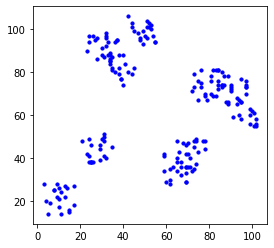

In [12]:
points = generate_points()

draw_points(points)


def calc_arrangement_cost(points_by_centroids: Dict[Point, List[Point]]):
    cost = 0
    for centroid, centroid_points in points_by_centroids.items():
        for point in centroid_points:
            cost += dist(centroid, point) ** 2
    return cost


# def cluster_by_k_means(count):


def cluster_by_k_means(points, clusters_count, debug=False):
    center = find_point_center(points)
    farthest_point = find_farthest_point_from_center(points, center)
    radius = dist(center, farthest_point)
    centroids = calc_raw_centroids(center, radius, clusters_count)
    points_by_centroids = group_points_by_centroids(points, centroids)
    arrange_centroids(points_by_centroids, debug=debug)
    return points_by_centroids

In [13]:
def calc_cost_for_costs_in_range(min_centroid_count=1,
                                 max_centroid_count=10):
    count_to_cost = [float('nan') for x in range(min_centroid_count)] + [0 for x in range(min_centroid_count, max_centroid_count)]

    # float('nan') if x==0 else x for x in values

    for selected_centroid_count in range(min_centroid_count, max_centroid_count):
        points_by_centroids = cluster_by_k_means(points, selected_centroid_count)
        count_cost = calc_arrangement_cost(points_by_centroids)
        count_to_cost[selected_centroid_count] = count_cost
    return count_to_cost

min_centroid_count = 1
max_centroid_count = 20
count_to_cost = calc_cost_for_costs_in_range(min_centroid_count, max_centroid_count)


2 0.7388567136183022 [278916.64000000025, 152957.24000000002, 59891.29166666669]
3 0.3492022834202034 [152957.24000000002, 59891.29166666669, 27392.450000000023]
4 0.15136052284940413 [59891.29166666669, 27392.450000000023, 22473.408333333355]
7 0.0 [15338.98947811447, 16650.128246230423, 16650.128246230423]
8 b=0


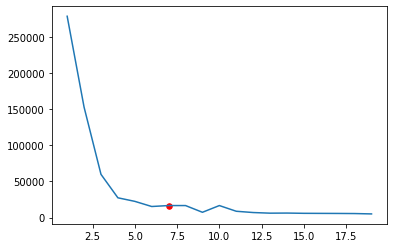

лучший: 7


In [14]:
def select_best_count(count_to_cost, debug=False):
    min_index = 1 #next(i for i, cost in enumerate(count_to_cost) if not isnan(cost))
    min_coefficient = inf
    best_count = None
    for current_count in range(min_index + 1, len(count_to_cost) - 1):
        # print(count_to_cost[current_count - 1], count_to_cost[current_count], count_to_cost[current_count + 1])
        a = count_to_cost[current_count] - count_to_cost[current_count + 1]
        b = count_to_cost[current_count - 1] - count_to_cost[current_count]

        a = abs(a)
        b = abs(b)

        if b == 0:
            print(current_count, "b=0")
            continue

        coefficient = a / b
        # print(current_count, coefficient)
        if coefficient >= 0 and min_coefficient > coefficient:
            print(current_count, coefficient, [count_to_cost[current_count-1], count_to_cost[current_count], count_to_cost[current_count + 1]])
            min_coefficient = coefficient
            best_count = current_count

    if debug:
        plt.plot(count_to_cost)
        plt.scatter(best_count, count_to_cost[best_count], s=30, color='r')
        plt.show()

    return best_count

best_count = select_best_count(count_to_cost, debug=True)

# counts = list(range(min_centroid_count, max_centroid_count))
# cost = [count_to_cost[x] for x in list(range(min_centroid_count, max_centroid_count))]
# count_to_cost[0] = 'nan'


print('лучший: ' + str(best_count))

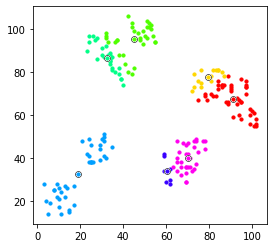

переместилось 7 центроид


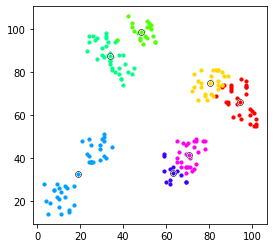

переместилось 6 центроид


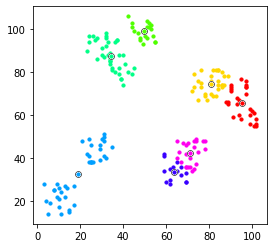

переместилось 6 центроид


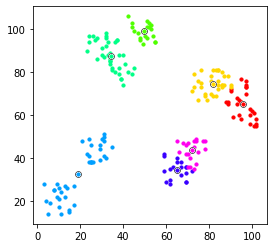

переместилось 4 центроид


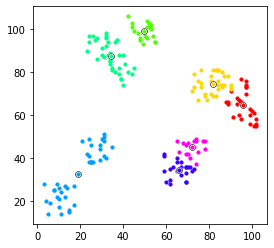

переместилось 4 центроид


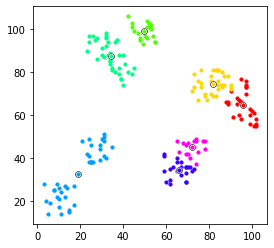

переместилось 0 центроид


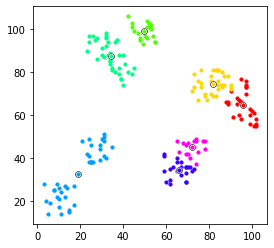

In [15]:
points_by_centroids = cluster_by_k_means(points, best_count, debug=True)

draw_group(points_by_centroids)

все:
1:


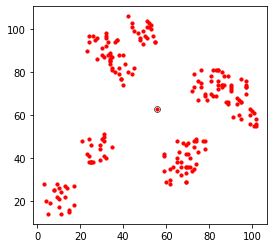

2:


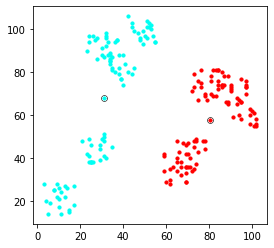

3:


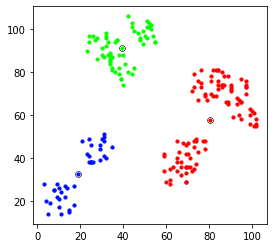

4:


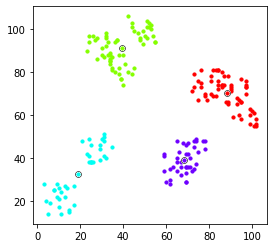

5:


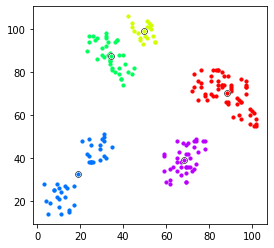

6:


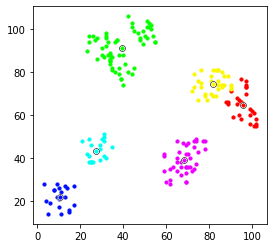

7:


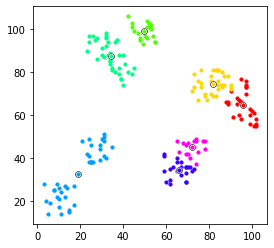

8:


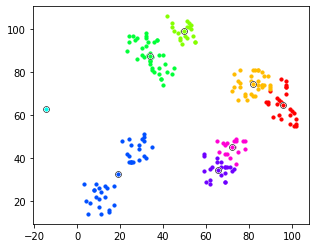

9:


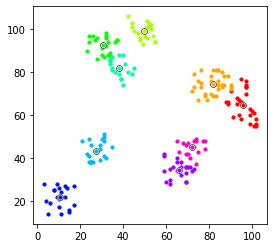

10:


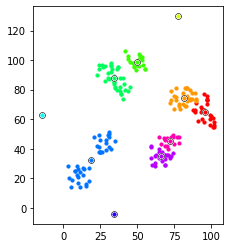

11:


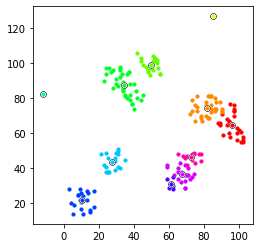

12:


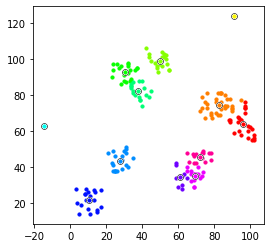

13:


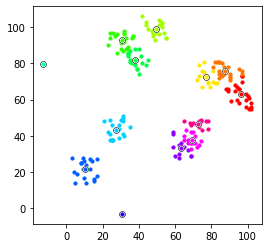

14:


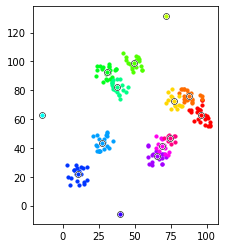

15:


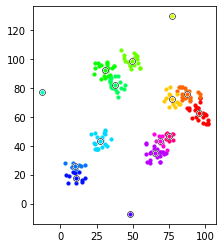

16:


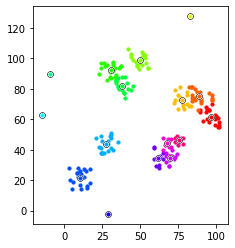

17:


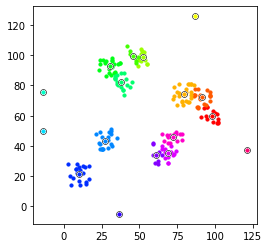

18:


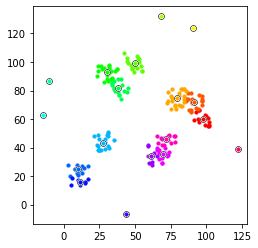

19:


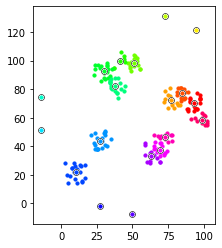

In [16]:
print('все:')

for count in range(min_centroid_count, max_centroid_count):
    print(str(count) + ':')
    draw_group(cluster_by_k_means(points, count))
    plt.show()


тестирую как работает функция выбора кол-ва кластеров
2 0.548286137407772 [386700.5749999999, 225920.37083333338, 137766.81371915882]
4 0.307319125951769 [137766.81371915882, 71263.32519012524, 50825.53122263914]
9 0.023813189181486855 [30055.302121212113, 11182.049999999996, 10732.617676767673]


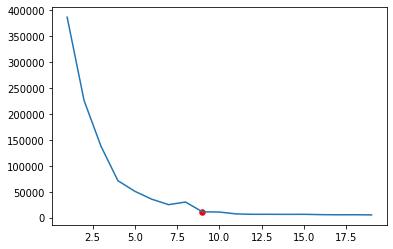

2 1.3218767780207017 [275175.11000000004, 197135.89963280284, 93977.67967333247]
3 0.38774246796350215 [197135.89963280284, 93977.67967333247, 53978.85687552563]
4 0.3428254636433581 [93977.67967333247, 53978.85687552563, 40266.24190467897]
10 0.007538199277747667 [17186.44475453714, 7045.147122485355, 6968.699999999998]


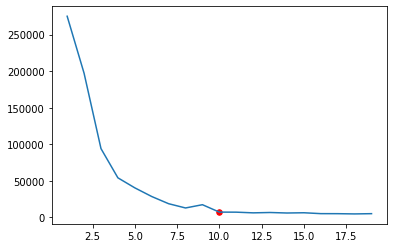

2 0.712728603053455 [217156.6800000003, 117815.77653108933, 47012.67317562429]
3 0.2854246392922824 [117815.77653108933, 47012.67317562429, 26803.722939616488]
8 0.16006188543794933 [12412.37089514825, 10290.690945212873, 9951.090852130323]


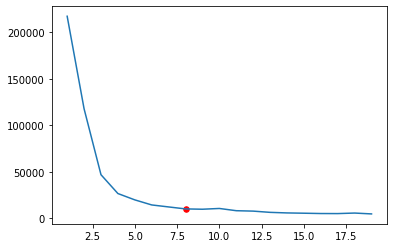

2 0.8716488956149451 [273293.67499999993, 151824.16904761907, 45945.408333333304]
3 0.1804243111953214 [151824.16904761907, 45945.408333333304, 26842.305861244036]
8 0.08303953703506456 [13456.76666666666, 8914.216103341098, 8537.004807604171]
13 0.0 [6465.710269360272, 6015.672400475337, 6015.672400475337]
14 b=0


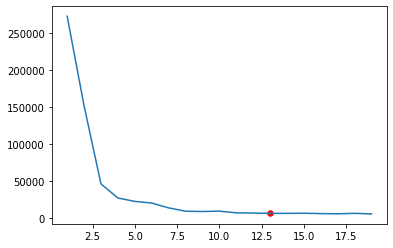

2 0.8649035172968993 [253705.39500000002, 149360.79761904775, 59112.78833333331]
3 0.26180802544655046 [149360.79761904775, 59112.78833333331, 35485.13522175846]
7 0.10952291717566208 [16592.924548440067, 9577.649999999996, 8809.316666666664]


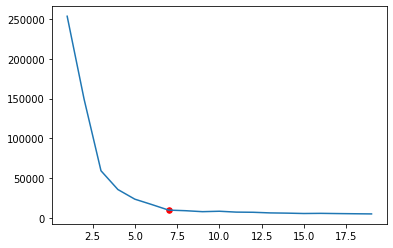

2 1.3834406503758887 [412701.27, 271033.50952380965, 75044.57083333326]
3 0.2153843066283099 [271033.50952380965, 75044.57083333326, 32831.62916666666]
4 0.16408283916520486 [75044.57083333326, 32831.62916666666, 25905.20984848483]
8 0.01773576717569206 [20758.1241039953, 13799.237470463873, 13675.816277329524]


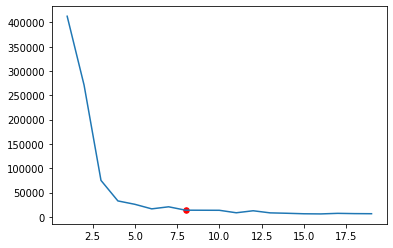

2 0.7611391257371638 [376409.7399999999, 207989.78585858594, 79798.7692066969]
3 0.15538705771605618 [207989.78585858594, 79798.7692066969, 59879.5443035299]
9 0.08633485191042951 [13553.472857142859, 9957.217857142863, 10267.700000000004]
10 0.0 [9957.217857142863, 10267.700000000004, 10267.700000000004]
11 b=0


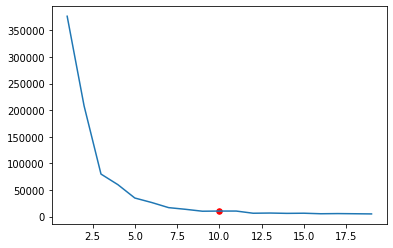

2 0.08186256108283249 [281262.4950000001, 88025.83458345835, 72206.98666666663]
6 7.684753790274252e-05 [42429.95573395506, 25565.16477873978, 25563.86876107763]


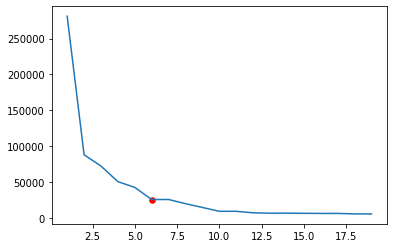

2 0.5280215245466517 [272596.06000000006, 134148.6166666667, 61045.386568213835]
3 0.25199002431871415 [134148.6166666667, 61045.386568213835, 42624.101837928145]
8 0.0 [12422.792789115645, 9176.278655913977, 9176.278655913977]
9 b=0


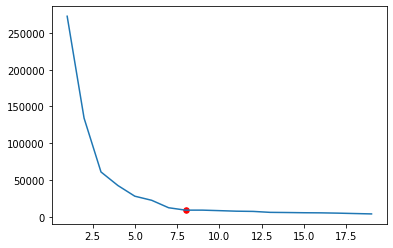

2 0.8135752012751843 [426994.9550000001, 275343.11666666646, 151962.94177087286]
3 0.4925284002177823 [275343.11666666646, 151962.94177087286, 91194.70161085745]
5 0.3032629010372566 [91194.70161085745, 43486.13809133019, 29017.900714078125]
7 0.021012286744816012 [29017.900714078125, 17727.69846650526, 17490.46549947229]
9 0.000535030111867403 [17490.46549947229, 8028.261428571428, 8033.323992673994]


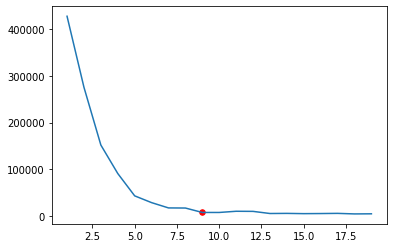

In [17]:
print('тестирую как работает функция выбора кол-ва кластеров')

test_count = 10

for i in range(test_count):
    points = generate_points()
    count_to_cost = calc_cost_for_costs_in_range(1, 20)
    select_best_count(count_to_cost, debug=True)

2 0.65 [22.5, 12.5, 6]
3 0.15384615384615385 [12.5, 6, 5]


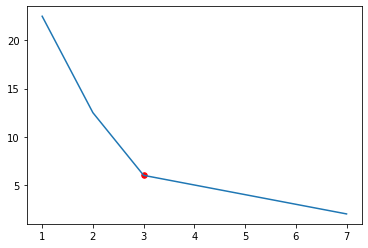

3

In [18]:
count_to_cost = [float('nan'), 22.5, 12.5, 6, 5, 4, 3, 2]
select_best_count(count_to_cost, debug=True)